In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving Razmetka_ready.xlsx to Razmetka_ready.xlsx


{'Razmetka_ready.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00;\x82nQ\x07AMb\x81\x00\x00\x00\xb1\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\x8e=\x0b\x021\x10D\xff\xcaq\xbd\xb7A\xc1Bb@\xd0R\xb0\xb2\x0f{\x1b/\x90dC\xb2B~\xbe9\xc1\x8fn\x1eo\x18F\xdf\ng*\xe2\xa9\x0e-\x86T\x8f\xe3"\x92\x0f\x00\x15\x17\x8a\xb6N]\xa7n\x1c\x97h\xa5cy\x00;\xe7\x91\xce\x8c\xcfHI`\xab\xd4\x1e\xa8\t\xa5\x99\xe6M\xfe\x0e\x8eF\x9fr\x0e\x1e\xadxN\xe6\xea\xb1pe\'\xc3\xa5!\x05\r\xffrm\xde\xa9\xd45\xef&\xf5\x96\x1f\xd6\xf0;i^PK\x03\x04\x14\x00\x00\x00\x08\x00;\x82nQNw\x15\xa2\xea\x00\x00\x00\xcb\x01\x00\x00\x11\x00\x00\x00docProps/core.xml\xa5\x91\xc1N\xc30\x0c\x86_e\xca\xbdu\xd3\x8d!E]. N !1\t\xc4-J\xbc-Z\xd3D\x89Q\xbb\xb7\'-[\x07\x82\x1b\xc7\xf8\xff\xfc\xd9V\x1a\x1d\x84\xf6\x11\x9f\xa3\x0f\x18\xc9bZ\x0c\xae\xed\x92\xd0a\xc3\x0eDA\x00$}@\xa7R\x99\x89.\x87;\x1f\x9d\xa2\xfc\x8c{\x08J\x1f\xd5\x1e\xa1\xae\xaa58$e\x14)\x18\x85E\x98\x8d\xec\xac4zV\x86\x8f\xd8N\x02\xa3\x01[t\xd8Q\x02^r\xb8\xb2\x84\xd1\xa5?\x1b\xa6d&\x87dg\xaa

In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 8.2MB 5.9MB/s 


In [ ]:
import pandas as pd
import seaborn as sns
import re
import pymorphy2 

In [ ]:
old_df = pd.read_excel('Razmetka_ready.xlsx')

In [ ]:
df = old_df[['responsibleperson_msg','entity_id','status','is_photo_answer' ,'Lie']]

In [ ]:
df['HypRecomend'] = 0
df['HypRequest'] = 0
df['HypPlanned'] = 0
df['HypPhoto'] = 0
df['HypYear'] = 0
df['HypRepair'] = 0
df['HypWork'] = 0
df['HypLook'] = 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
morph = pymorphy2.MorphAnalyzer()

# morph.normal_forms(data[q][i][j])
for i in range(0, len(df)):

  t = []
  for word in str.split(df['responsibleperson_msg'][i],' '):
    if (len(word) > 2 ) and (word[2] != '\''):

        start = 0
        end = -1

        while (word[start] == '\'' or word[start] == '['):
          start += 1
        while (word[end - 1] == '\'' or word[end - 1] == ']'):
          end -= 1

        t.append(word[start:end])

    if (word[2] == '\'') and (len(word) > 4):

      for more_words in str.split(word, ' '):

        start = 0
        end = -1

        while (more_words[start] == '\'' or more_words[start] == '['):
          start += 1
        while (more_words[end - 1] == '\'' or more_words[end - 1] == ']'):
          end -= 1

        t.append(more_words[start:end])

  #start hypothesises
  df['HypPhoto'][i] = int(df['is_photo_answer'][i])
  
  for word in t:

    if word == 'год':
      df['HypYear'][i] = 1

    if (word == 'запрос'):
      df['HypRequest'][i] = 1

    if (word == 'рассмотреть') or ( word == 'рассмотрение'):
      df['HypLook'][i] = 1

    if (word == 'план') or (word == 'планировать') or (word == 'запланировать') or (word == 'планироваться') or (word == 'плановый'):
      df['HypPlanned'][i] = 1

    if (word == 'рекомендация'):
      df['HypRecomend'][i] = 1

    if (word == 'работа'):
      df['HypWork'][i] = 1

    if (word == 'ремонт'):
      df['HypRepair'][i] = 1


In [ ]:
for columns in df.columns:
  if columns[0:3] == 'Hyp':
    print(df[columns].value_counts())

0    50
1     2
Name: HypRecomend, dtype: int64
0    51
1     1
Name: HypRequest, dtype: int64
0    44
1     8
Name: HypPlanned, dtype: int64
0    44
1     8
Name: HypPhoto, dtype: int64
1    32
0    20
Name: HypYear, dtype: int64
0    38
1    14
Name: HypRepair, dtype: int64
1    27
0    25
Name: HypWork, dtype: int64
0    28
1    24
Name: HypLook, dtype: int64


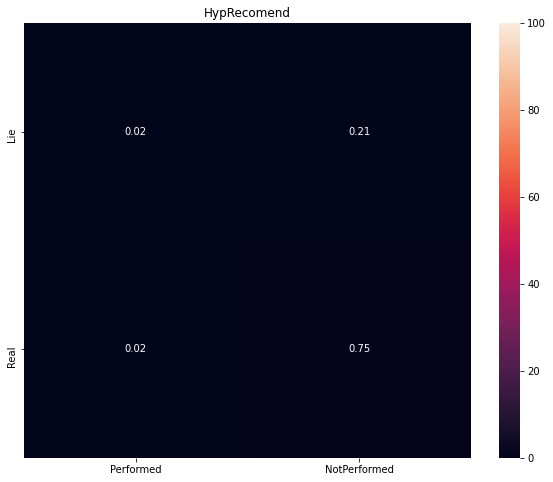

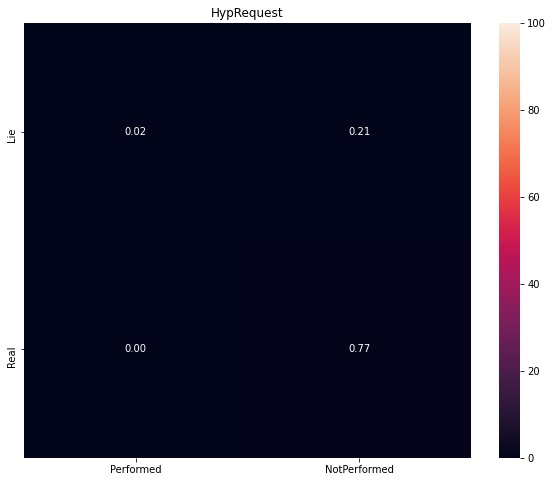

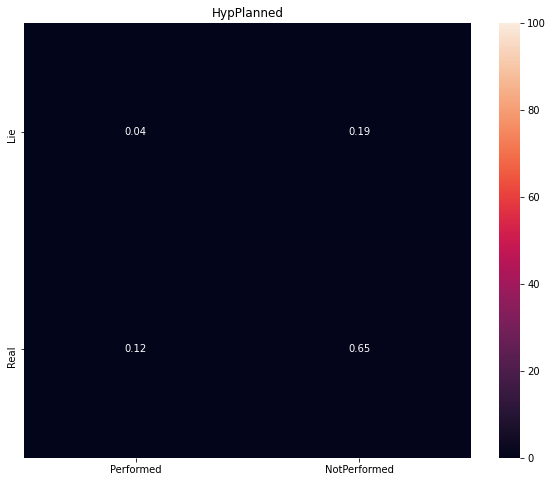

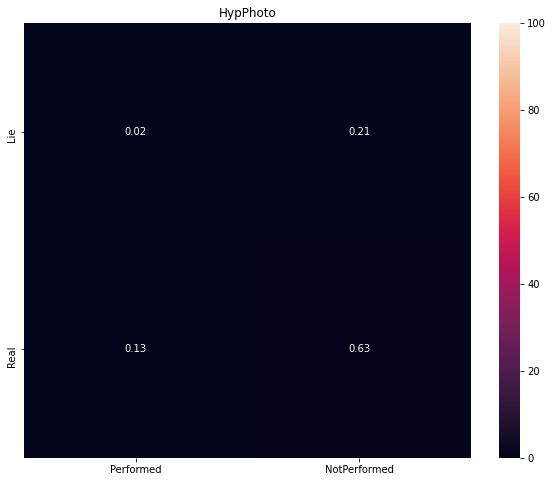

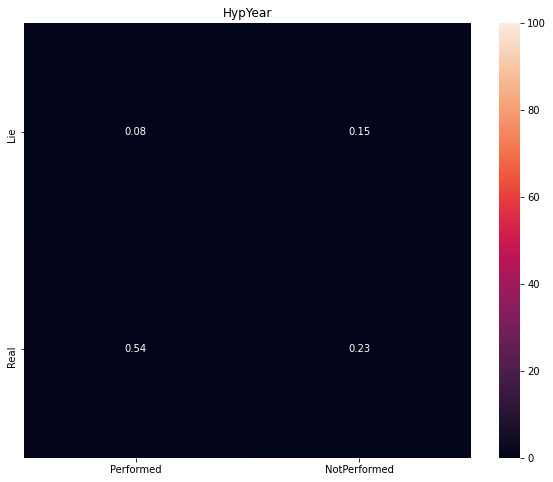

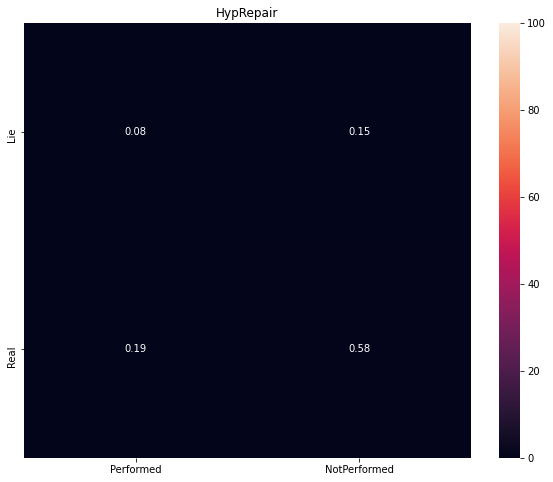

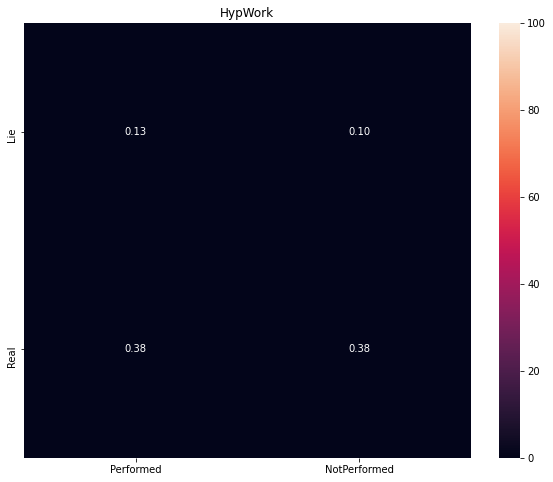

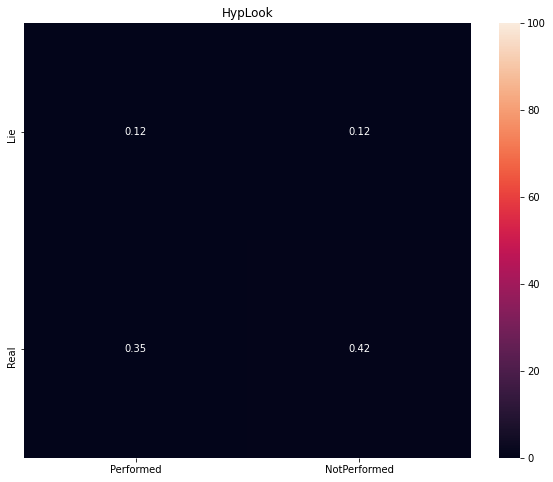

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
%matplotlib inline

for column in df.columns:

  if column[0:3] == 'Hyp':

    conf_arr = np.array([[len(df[(df['Lie'] == 1) & (df[column] == 1)])/len(df[column]), len(df[(df['Lie'] == 1) & (df[column] == 0)])/len(df[column])],
                     [ len(df[(df['Lie'] == 0) & (df[column] == 1)])/len(df[column]),  len(df[(df['Lie'] == 0) & (df[column] == 0)])/len(df[column])]])

    df_cm = pd.DataFrame(conf_arr, 
                  index = ['Lie', 'Real'],
                  columns = ['Performed', 'NotPerformed'])
    
    fig = plt.figure(figsize=(10, 8))
    res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f')
    plt.title(column)
    plt.savefig(column+'ConfusionTable.png', format='png')

In [115]:
for column in df.columns:
  if column[0:3] == 'Hyp':
    files.download(column+'ConfusionTable.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>